In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_style("whitegrid")

def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

global_min_steps = 500
global_max_steps = 50000
global_min_points = 10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
generate_default_plot_env()

In [4]:
same_koppen_df = pd.read_csv('../data/steps_vs_binned_ws_same_koppen.csv')

                            OLS Regression Results                            
Dep. Variable:             steps_diff   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     26.22
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           3.29e-07
Time:                        14:00:29   Log-Likelihood:                -22917.
No. Observations:                2441   AIC:                         4.584e+04
Df Residuals:                    2439   BIC:                         4.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3143     58.574      0.244      0.8

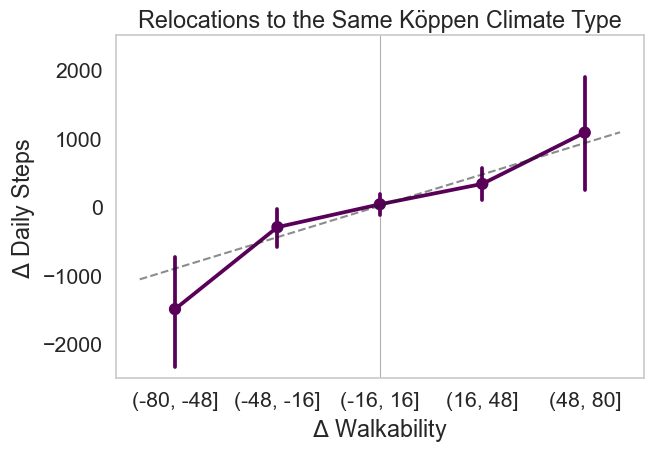

In [7]:
from __future__ import unicode_literals

sns.despine(left=True)
centerline_color = '#590059'

import statsmodels.formula.api as smf
results = smf.ols('steps_diff ~ 1 + ws_diff', data=same_koppen_df).fit()
print(results.summary())

g = sns.pointplot(y='steps_diff', x='ws_diff_bin', data=same_koppen_df, color=centerline_color)
g.axvline(x=2, color='#b0b0b0', linewidth=0.8, zorder=-1)
sns.regplot(x=2.5 + (same_koppen_df['ws_diff'] - 16)/32, y=same_koppen_df['steps_diff'], 
            x_bins=range(-2, 2+1, 1), scatter=False, ci=None, ax=g, color='k', 
            line_kws={'linestyle': '--', 'linewidth': 1.5, 'color':'k', 'alpha': 0.5})

plt.setp(g.get_xticklabels(), rotation=0)

g.set_xlabel('$\Delta$ Walkability')
g.set_ylabel('$\Delta$ Daily Steps')
g.set_ylim(-2500, 2500)
g.grid(False)
g.set_title('Relocations to the Same Köppen Climate Type')

figure = plt.gcf() # get current figure
figure.set_size_inches(7, 5)
plt.tight_layout()
plt.savefig('../output/fig13.pdf', dpi=300)